# Geopandas Lat Long From Documents

# Adding labels to existing pipeline

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('lat_long_geopandasdata.csv', index_col = 0, usecols=['sentence', 'LAT', 'LONG'])

In [24]:
#https://stackoverflow.com/questions/33997361
def dms2dd(s):
    # example: s = """0°51'56.29"S"""
    try:
        
        degrees, minutes, seconds = re.split('[°\'"]+ ', s)
        degrees = int(degrees)
        minutes = int(minutes)
        seconds = int(seconds)
        #seconds = int(seconds)
        #print(type(int(degrees)), type(int(minutes)), seconds)
    except:
        try: 
            degrees, minutes = re.split('[°\'"]+', s)
            seconds = 0
            degrees = int(degrees)
            minutes = int(minutes)
            seconds = int(seconds)
        #print(type(int(degrees)), type(int(minutes)), seconds)
        except:
            try:
                degrees, something = re.split('[°\'."]+ ', s)
                seconds = 0
                minutes = 0
                degrees = int(degrees)
                minutes = int(minutes)
                seconds = int(seconds)
            except:
                degrees = 0
                seconds = 0
                minutes = 0
                degrees = int(degrees)
                minutes = int(minutes)
                seconds = int(seconds)

    dd = degrees + float(minutes)/60 + float(seconds)/(60*60);

    return dd

In [67]:
df = df.reset_index()


In [68]:
df['LAT2'] = df['LAT'].apply(dms2dd)
df['LONG2'] = df['LONG'].apply(dms2dd)

In [81]:
df.loc[[4,6], :]

,sentence,LAT,LONG,LAT2,LONG2,geometry
4,"water depth Lac ~ Magie 44° 15' 50N, 66° 04' 4...",44° 40' 05,-63° 56' 20,44.668056,-62.061111,POINT (-62.06111 44.66806)
6,"water depth Killarney Lake 46° 00' 50N, 66° 37...",46° 00' 50,-66° 37' 40,46.013889,-65.372222,POINT (-65.37222 46.01389)


In [85]:
geometry = geopandas.points_from_xy(df.LONG2, df.LAT2)


In [86]:
geo_df = geopandas.GeoDataFrame(df[['sentence', 'LAT2', "LONG2"]], geometry=geometry)
geo_df

,sentence,LAT2,LONG2,geometry
0,Location and Description of Sites Basswood Roa...,45.254167,-66.669444,POINT (-66.66944 45.25417)
1,51° 35' S 72° 38' W,-50.416667,0.000000,POINT (0.00000 -50.41667)
2,52° 4' S 69° 7' W,-52.000000,0.000000,POINT (0.00000 -52.00000)
3,Cores recovered from the Salar de Uyuni (20° S...,0.000000,0.000000,POINT (0.00000 0.00000)
4,"water depth Lac ~ Magie 44° 15' 50N, 66° 04' 4...",44.668056,-62.061111,POINT (-62.06111 44.66806)
5,This interpretation is supported by correlatio...,0.000000,0.000000,POINT (0.00000 0.00000)
6,"water depth Killarney Lake 46° 00' 50N, 66° 37...",46.013889,-65.372222,POINT (-65.37222 46.01389)
7,"~ o • 0 Torres del Paine (50 o 59' S, 72 o 4' ...",-50.000000,-72.000000,POINT (-72.00000 -50.00000)
8,"Gran Sabana, Venezuela About 15 Holocene polle...",4.000000,-63.000000,POINT (-63.00000 4.00000)
9,number Age (BP) Depth of lower Depth of (cm -)...,45.255556,-66.669444,POINT (-66.66944 45.25556)


In [91]:
geo_df.to_csv('new_trial.csv')

In [71]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

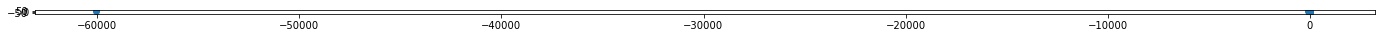

In [90]:
fig, ax = plt.subplots(figsize=(24,18))
world.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(ax=ax)

In [64]:
gdf.reset_index

<bound method DataFrame.reset_index of                                                            LAT          LONG  \
sentence                                                                       
Location and Description of Sites Basswood Road...  45° 15' 15   -67° 19' 50   
51° 35'  S 72° 38' W                                   -51° 35     -72° 38'    
52° 4' S 69° 7' W                                      -52° 4'      -69° 7'    
Cores recovered from the Salar de Uyuni (20° S,...        -20°          -68°   
water depth Lac ~ Magie 44° 15' 50N, 66° 04' 45...  44° 40' 05   -63° 56' 20   
This interpretation is supported by correlation...        -20°          -68°   
water depth Killarney Lake 46° 00' 50N, 66° 37'...  46° 00' 50   -66° 37' 40   
~ o • 0 Torres del Paine (50 o 59' S, 72 o 4' W...    -50° 59'       -72° 4'   
Gran Sabana, Venezuela About 15 Holocene pollen...   4° 30’ 10      -63° 30’   
number Age (BP) Depth of lower Depth of (cm -)(...  45° 15' 20   -67° 19' 50   
H